## 1. Introduction

I pick Tantanic data set which include whether survived, name,sex,age,sibling,parch,ticket,fare,cabin,etc information.
Here is few questions I'm interested :

The relationship between survived rate and age ,sex,Pclass

## 2. Set Up

### 2.1 First I load essencial package into python and load titanic data set to data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv("titanic-data.csv")

### 2.2 Check what data look like 

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Data Cleaning/Wrangling

###  3.1 Subset dataset, only catch ID,Surviced,Pclass,Sex,Age columns.

Here we only care about Pclass,Sex,Age columns

In [5]:
data_df=data.loc[:,["Survived","Pclass","Sex","Age"]]

In [6]:
data_df.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


### 3.2 Dealing with null values


#### 3.2.1 Check null values in each column 

In [7]:
data_df.isnull().values.any()

True

In [8]:
data_df["Pclass"].isnull().values.any()

False

In [9]:
data_df["Sex"].isnull().values.any()

False

In [10]:
data_df["Age"].isnull().values.any()

True

In [11]:
data_df["Survived"].isnull().values.any()

False

We can see Age colum have null values and next step is to fill the null values.

####  3.2.2  Age column fill null values

I use average age value to fill the Null value.

In [12]:
age_mean=round(data_df["Age"].mean(),0)
age_mean

30.0

In [13]:
data_df["Age"]=data_df["Age"].fillna(age_mean)

In [14]:
data_df["Age"].isnull().values.any()

False

### 3.3. Check validity of data of each column

#### 3.3.1 Check survived

Survived should only contain 0 and 1 

In [15]:
data_df["Survived"].unique()

array([0, 1], dtype=int64)

#### 3.3.2 Check Pclass 

there should be only 1, 2, 3 class in tatanic 

In [16]:
data_df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

#### 3.3.3 Check Age


Find min and max Age 

In [17]:
data_df["Age"].max()

80.0

In [18]:
data_df["Age"].min()

0.41999999999999998

So the age is (0~80)

#### 3.3.4 Check Sex and set male to value 0 and female to value 1

There should only male and female in Sex column

In [19]:
data_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Map male,female to 0,1 so corr can use it to calculate

In [20]:
Sex_map={"male":0,"female":1}
data_df["Sex"]=data_df["Sex"].map(Sex_map)

## 4. Correlation between each other

In [21]:
data_df.corr()

,Survived,Pclass,Sex,Age
Survived,1.000000,-0.338481,0.543351,-0.070657
Pclass,-0.338481,1.000000,-0.131900,-0.329727
Sex,0.543351,-0.131900,1.000000,-0.084660
Age,-0.070657,-0.329727,-0.084660,1.000000


The Survived is negetively related with Pclass which means the higher Pclass the higher chance to survice.
The Survied is positive related with Sex which means woman have higher chance to survive against man.

#### 4.1 The relationship between Survived and Pclass

In [22]:
class_survive=data_df.groupby("Pclass")["Survived"].mean()
class_survive

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

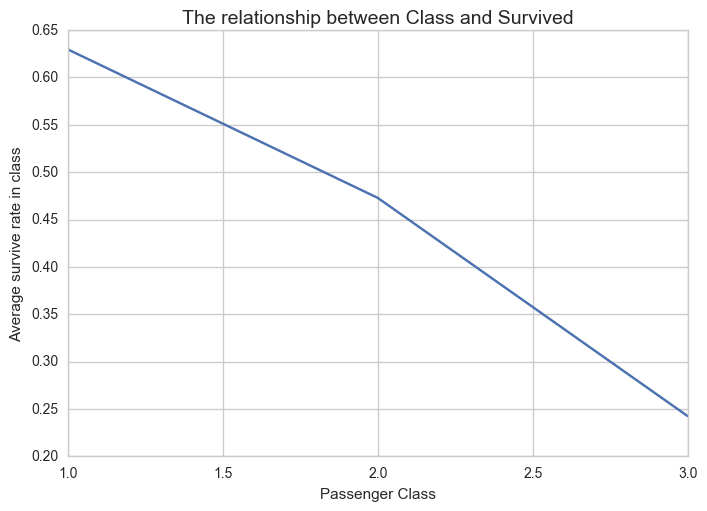

In [23]:
plt.plot(class_survive)
plt.xlabel("Passenger Class")
plt.ylabel("Average survive rate in class")
plt.title("The relationship between Class and Survived",fontsize=14)
plt.show()

Plot shows higher class has higher survived rate

#### 4.2 The relationship between Survive and Sex

In [24]:
sex_survive=data_df.groupby("Sex")["Survived"].mean()
sex_survive

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

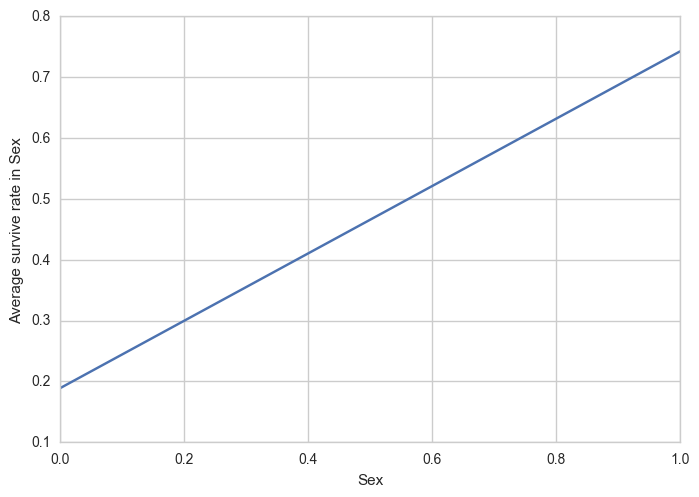

In [25]:
plt.plot(sex_survive)
plt.xlabel("Sex")
plt.ylabel("Average survive rate in Sex")
plt.show()

Plot above shows female have higher survive rate than male.

#### 4.3 The relationshuo between Survive and Age 

In [ ]:
age_survive=data_df.groupby("Age")["Survived"].mean()
age_survive

In [ ]:
plt.plot(age_survive)
plt.xlabel("Age")
plt.ylabel("Average survive in age")
plt.show()

We can see old people and children have higher survive rate then young people.

#### 4.4 The relationship between gender,Pclass and survive

In [ ]:
sns.barplot(x="Sex",y="Survived",hue="Pclass",data=data_df)
plt.show()

By comparing male at left and female at right, we can see clearly female has much higher survive rate , plot alos indicate
that higher class has higher survive rate.

## 5. Hypothesis Test

Use statistical test to check if Age, Gender, Class is related with Survive.
By checking this, we use Chi-Square test for in dependence

Null Hypothesis: Survived chance is independent with variable
Alternative Hypothesis: Survived chance is not independent

### 5.1 Between Sex and Survive

In [ ]:
sex_survive_cross= pd.crosstab([data_df['Survived']], data_df['Sex'])
sex_survive_cross

In [ ]:
stats.chi2_contingency(sex_survive_cross)

While p value is less than 0.05, we reject the null hypothesis and believe they are not independent

### 5.2 Between Class and Survive

In [ ]:
class_survive_cross=pd.crosstab([data_df["Survived"]],data_df["Pclass"])
class_survive_cross

In [ ]:
stats.chi2_contingency(class_survive_cross)

While p value is less than 0.05, we reject the null hypothesis and believe they are not independent

### 5.3 Betweem Age and Survive

First cut age group into 0-20,20-40,40-60,60-80 group

In [ ]:
data_df["Age_Group"]=pd.cut(data_df["Age"],bins=[0,20,40,60,80])

In [ ]:
age_survive_cross=pd.crosstab([data_df["Survived"]],data_df["Age_Group"])

In [ ]:
age_survive_cross

In [ ]:
stats.chi2_contingency(age_survive_cross)

While p value is larger than 0.05, we accept the null hypothesis that they are independent